In [2]:
from decoder import *
import scipy.io as scio
import matplotlib.pyplot as plt
import numpy as np
from clusteringtools import *
%matplotlib inline

In [3]:
dprimelocsort = np.array([ 59,  14, 299,  58,  82, 116, 150, 276, 251,  54,  74, 101, 235,
        46, 119,  15, 151, 102,  13, 195, 247,  52, 103,  55, 225, 163,
        16,  92, 278,  49,   0,  99, 239,  97, 153, 283,  25,  37,  44,
       286, 122, 264,  10, 113,  64,  79,  95, 169, 258,  23, 254, 209,
         4,  90, 267, 112, 105, 292, 244, 277, 253,  65,  21, 240, 120,
       194, 242, 188, 213, 140, 197,  91, 245,  71, 255,  35, 124, 148,
       129, 152, 155, 180,  87, 232, 246,  24,  93, 223,  96, 234,   9,
       291, 114, 233, 287,  57,  85, 117, 224, 104, 296, 160, 238,  81,
       134, 250, 249, 241, 243, 210, 237, 143, 219,  80, 202, 109, 193,
        84, 146, 126,  26,  40,  42,   5, 199,  45, 137,  77,  11, 158,
       173,  53, 144,  43, 265, 222, 157, 132,  63, 128,  30, 176, 168,
        39, 217, 182,  20,  86, 107,   2, 248, 281, 165, 121,  17, 273,
       206, 130, 282, 186, 293,  48, 284, 141,  38, 167,  83, 228, 183,
       156, 164, 177, 179, 220, 110, 215, 229, 216,  73, 191, 201,  50,
        98,  32, 270, 295, 207, 263,  18,   1, 147,  34, 135,  27, 136,
       211, 257,   7, 111, 125,  66, 108, 256, 159,  33, 198, 200, 171,
       297, 203, 187, 189,  19, 268,  29, 190, 162, 133, 294, 262,  36,
       298,  89, 271, 280,  94, 131, 174,   8, 145, 139, 161, 204,  60,
        78, 138, 106,  28, 227, 115, 266, 221,  72, 230, 118, 208, 172,
       272,  47, 231, 175, 154, 166, 259, 212, 100, 260,  67, 236, 290,
        56,  51,  70,  41, 181, 196, 218, 269,  69, 142,  88, 205, 149,
        76, 123, 261, 185, 252,  62, 285, 275, 184, 127, 178,  31,  22,
       279,  12, 170, 192,   3,  68, 289,  61,  75, 214, 274, 226, 288,   6])

dprimeorisort = np.array([127, 178, 292,  75,  76,  69,  58, 272, 222, 181,  47, 108, 294,
         8, 125,  41, 194, 285, 186, 227, 284, 279, 268, 225, 189,  62,
       243,  52,   3, 282, 204, 110,  55, 264, 134,  10, 218, 200, 256,
       100,  64, 104, 237, 161, 208, 137, 266, 119,  40,  45, 149, 252,
        83, 166, 262, 207, 216,  18, 142, 217, 131, 295, 280,  11, 259,
       192,  38, 158, 147, 286, 109,  24, 115, 270,  96,  60, 223,  19,
       101, 199, 273,  39, 196, 221, 103, 153, 288, 184, 128,  37, 228,
       289,  99,  93,  57,  51,  73, 175, 283, 120, 167, 236,  32, 202,
       102, 117,  36,  80, 121, 242, 107,  28, 116,   4, 232,  63, 124,
        89, 197, 244, 140,  13, 198, 201, 276, 179, 296, 106,  26, 234,
       168,  21, 290, 265, 187, 164,  86,   7, 277, 267,  30, 191, 211,
       253, 156, 163, 203,  68,  46,  25, 170,  53,  48, 177, 248,  71,
       150,  90, 291, 114, 220, 165,  95, 112, 206,  43,   1, 143, 129,
       174, 219, 180, 235,  91, 224, 190, 257, 169,  27, 141, 271, 250,
       122, 185, 209, 126,  79,  29,  34,  20,  65, 278, 287, 233, 215,
       246, 245,  98, 193,  49, 226, 238,  87,  94,  67,  42, 274, 214,
        16, 154, 152, 195, 213, 297, 263, 183, 230, 182, 123,  82, 148,
       254,  44,  77, 132, 293, 210, 261, 258, 135,  66, 249, 133, 188,
       111, 240, 299,   0,   9,  78, 173, 162,  50, 171, 172,  35, 241,
       247,  33, 251, 260, 229, 113,  23, 138,  85,  56, 130, 239,  97,
       212,  54, 281,  72,   5, 139,  17,  12, 275, 255, 176,   2,  70,
        22, 298,  81, 144, 105,  74,  61, 146, 160, 145, 136, 269, 155,
        84,  14, 205, 151,  59,  92, 157, 231, 159,  31,  88,  15, 118,   6])

In [4]:
def plotdecoder(avgperformance, stddev, nvalids, precenter, postcenter, weights, sort=None):
    plt.figure(figsize=(6, 1), dpi= 80, facecolor='w', edgecolor='k')
    plt.title('Useable Fraction of Trials')
    plt.plot(nvalids/np.max(nvalids))
    plt.show()
    
    plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
    plt.imshow(avgperformance, cmap='hot', interpolation='nearest', extent=[-precenter, postcenter, postcenter, -precenter])
    plt.colorbar()
    plt.title('Performance')
    plt.xlabel("Test Time")
    plt.ylabel("Train Time")
    plt.show()
    # plt.savefig('../outputs/plot_for_pres_{}_decoder_perf_delay={}_span={}.png'.format(mode, postcenter, span))
    # plt.clf() 
    plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
    plt.imshow(stddev, cmap='hot', interpolation='nearest', extent=[-precenter, postcenter, postcenter, -precenter])
    plt.colorbar()
    plt.title('Stdev Performance')
    plt.xlabel("Test Time")
    plt.ylabel("Train Time")
    plt.show()
    # plt.savefig('../outputs/plot_for_pres_{}_decoder_error_delay={}_span={}.png'.format(mode, postcenter, span))
    # plt.clf()
    plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
    plt.title('Performance along diagonal')
    plt.xlabel("Time")
    # plt.plot(np.diag(avgperformance))
    plt.errorbar(np.arange(-precenter, postcenter), np.diag(avgperformance), yerr=2*np.diag(stddev))
    plt.plot(np.arange(0, postcenter), np.poly1d(np.polyfit(np.arange(0, postcenter), np.diag(avgperformance)[10:], 1))(np.arange(0, postcenter)))
    # plt.savefig('../outputs/plot_for_pres_{}_decoder_diag_perf_delay={}_span={}.png'.format(mode, postcenter, span))
    plt.show()
    
    plot_weights(weights, sort=sort)
    
    effectivedimsquardic = []
    effectivedimsquadratic = []
    for t in range(weights.shape[0]):
        effectivedimsquardic.append(effective_fractional_dimensionality(weights[t], mode='quardic'))
        effectivedimsquadratic.append(effective_fractional_dimensionality(weights[t], mode='quadratic'))
        
    plt.figure(figsize=(6, 2), dpi= 80, facecolor='w', edgecolor='k')
    plt.title('Effective Dimensionality')
    plt.xlabel("Time")
    plt.plot(effectivedimsquardic)
#     plt.plot(effectivedimsquadratic)
    plt.show()
    
    plt.figure(figsize=(6, 2), dpi= 80, facecolor='w', edgecolor='k')
    plt.title('Mean Weights')
    plt.xlabel("Time")
    plt.errorbar(np.arange(0, weights.shape[0]), np.mean(np.abs(weights), axis=1), np.std(np.abs(weights), axis=1))
    plt.plot(np.max(np.abs(weights), axis=1))
    plt.plot(np.min(np.abs(weights), axis=1))
    plt.show()
    
def plot_weights(weights, sort=None):
    if sort is not None:
        weightorders = sort
    else:
        weightorders = np.argsort(-np.mean(weights, axis=0))
    plt.figure(figsize=(6, len(weightorders)*.15), dpi= 80, facecolor='w', edgecolor='k')
    plt.imshow(weights.T[weightorders], cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Weights')
    plt.xlabel("Train Time")
    plt.ylabel("Neuron")
    plt.show()
    
precenter = 10
postcenter = 40
span = 1
N = 20

Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Iter 9
Iter 10
Iter 11
Iter 12
Iter 13
Iter 14
Iter 15
Iter 16
Iter 17
Iter 18
Iter 19
Iter 20


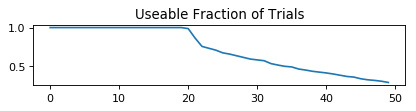

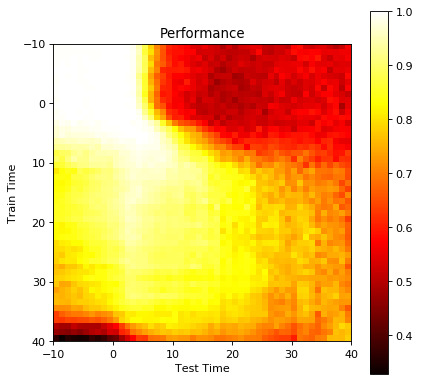

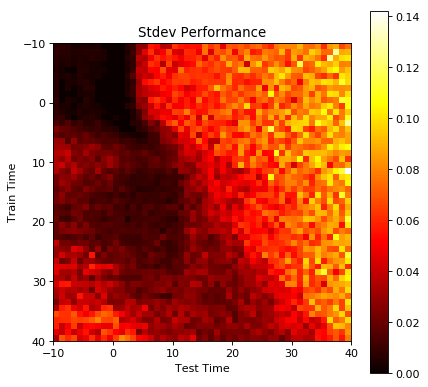

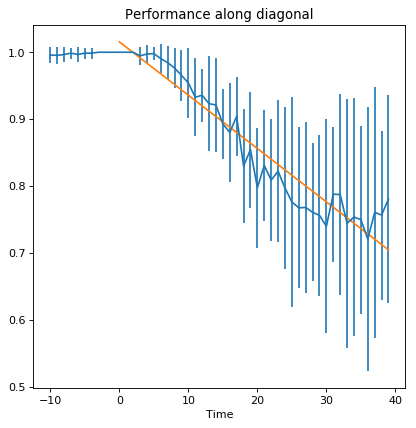

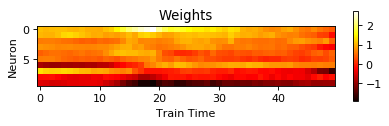

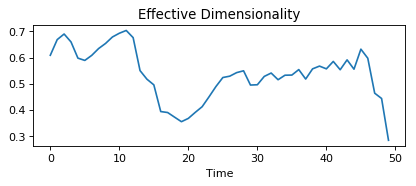

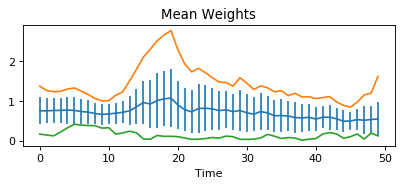

In [6]:
LDLOCperformance, LDLOCavgperformance, LDLOCstddev, LDLOCnvalids, LDLOCweights = decoder(precenter, postcenter, span, N, mode='latent', target='location', latentvarpath='../runs/compiled_dF033016.pldsip_nld_10_plds_2018-4-16-16-2-3/output.pldsop')
plotdecoder(LDLOCavgperformance, LDLOCstddev, LDLOCnvalids, precenter, postcenter, LDLOCweights)
np.save('LDLATweights.npy', LDLOCweights)

Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Iter 9
Iter 10
Iter 11
Iter 12
Iter 13
Iter 14
Iter 15
Iter 16
Iter 17
Iter 18
Iter 19
Iter 20


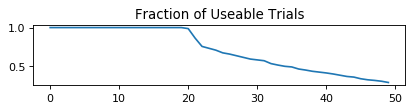

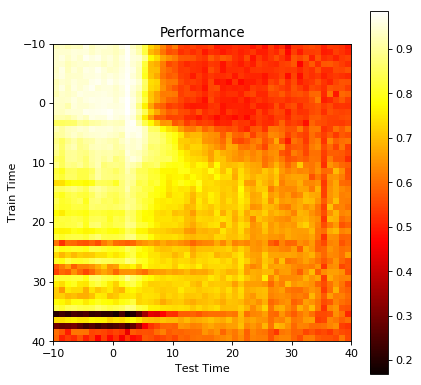

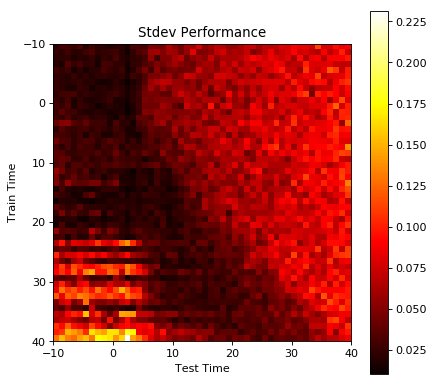

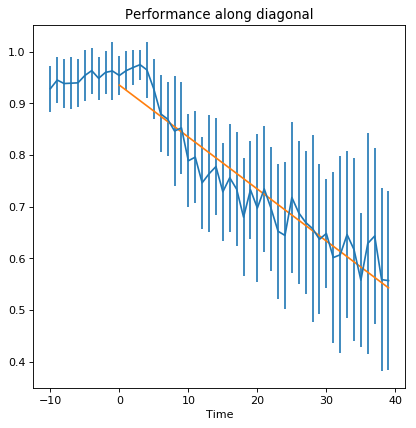

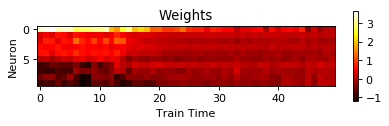

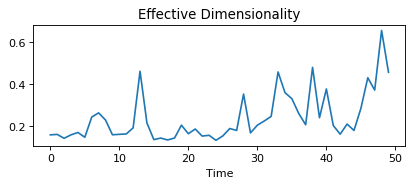

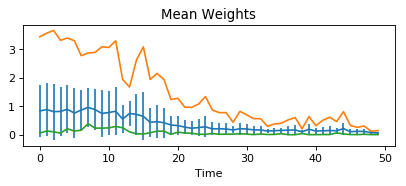

In [6]:
PCALOCperformance, PCALOCavgperformance, PCALOCstddev, PCALOCnvalids, PCALOCweights = decoder(precenter, postcenter, span, N, mode='pca', target='location')
plotdecoder(PCALOCavgperformance, PCALOCstddev, PCALOCnvalids, precenter, postcenter, PCALOCweights)

Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Iter 9
Iter 10
Iter 11
Iter 12
Iter 13
Iter 14
Iter 15
Iter 16
Iter 17
Iter 18
Iter 19
Iter 20


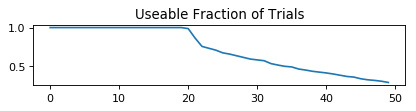

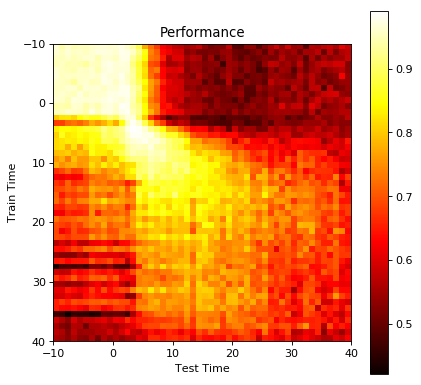

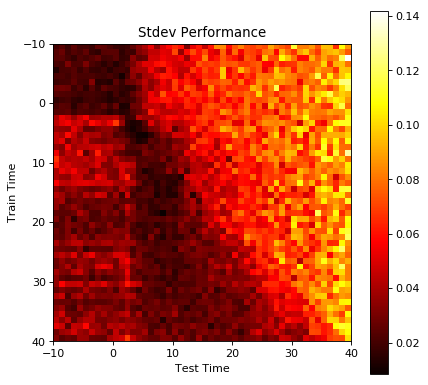

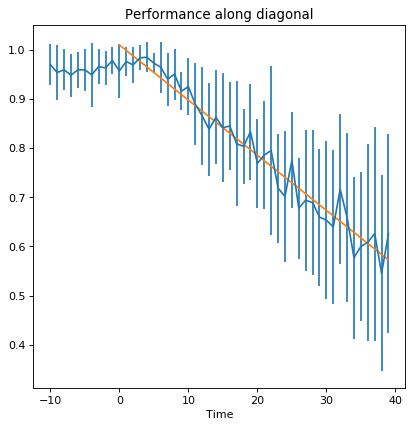

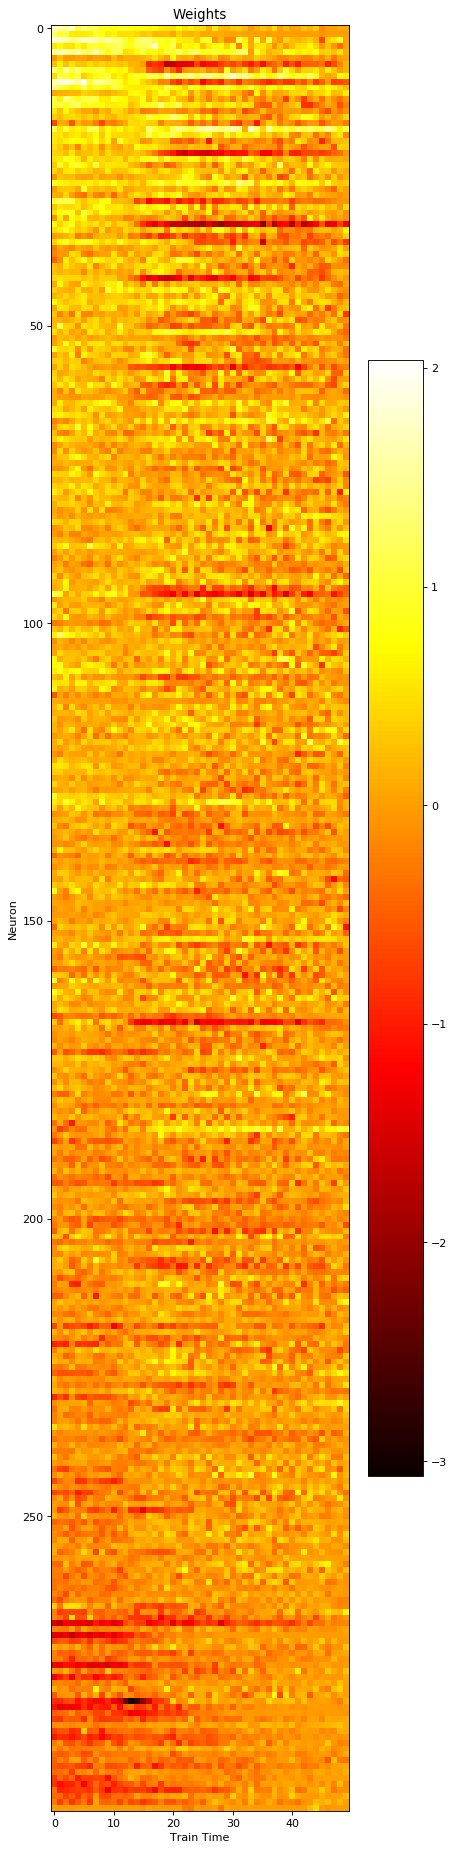

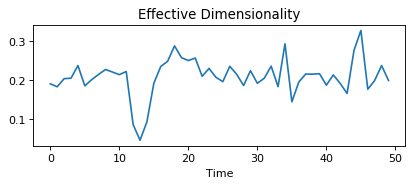

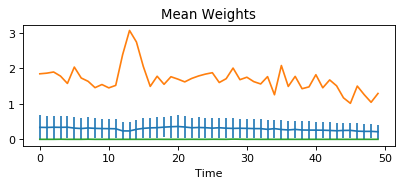

In [7]:
STALOCperformance, STALOCavgperformance, STALOCstddev, STALOCnvalids, STALOCweights = decoder(precenter, postcenter, span, N, mode='normalized', target='location')
plotdecoder(STALOCavgperformance, STALOCstddev, STALOCnvalids, precenter, postcenter, STALOCweights, sort=dprimelocsort)

Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Iter 9
Iter 10
Iter 11
Iter 12
Iter 13
Iter 14
Iter 15
Iter 16
Iter 17
Iter 18
Iter 19
Iter 20


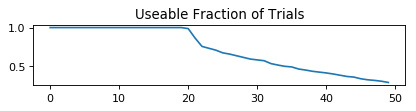

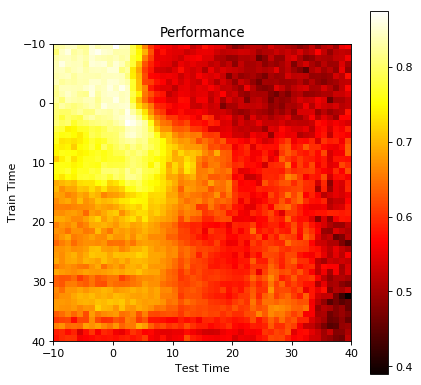

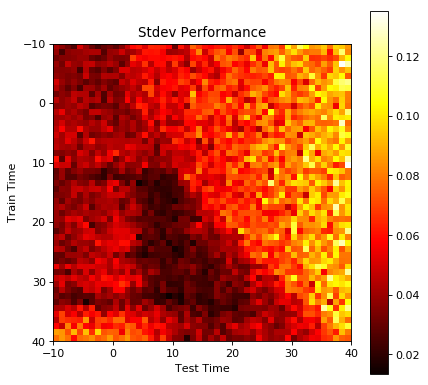

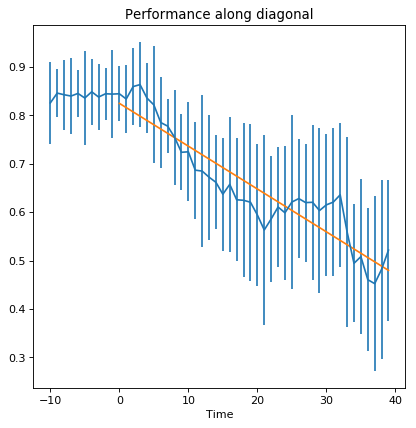

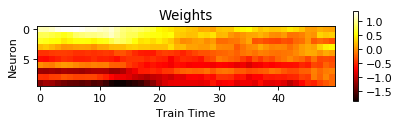

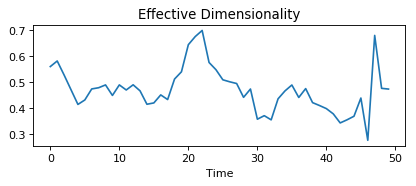

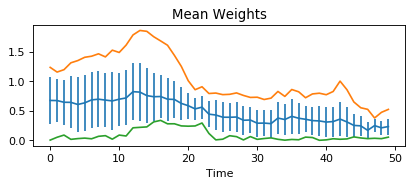

In [29]:
LDORIperformance, LDORIavgperformance, LDORIstddev, LDORInvalids, LDORIweights = decoder(precenter, postcenter, span, N, mode='latent', target='orientation', latentvarpath='../runs/compiled_dF033016.pldsip_nld_10_plds_2018-4-16-16-2-3/output.pldsop')
plotdecoder(LDORIavgperformance, LDORIstddev, LDORInvalids, precenter, postcenter, LDORIweights)

Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Iter 9
Iter 10
Iter 11
Iter 12
Iter 13
Iter 14
Iter 15
Iter 16
Iter 17
Iter 18
Iter 19
Iter 20


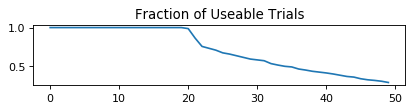

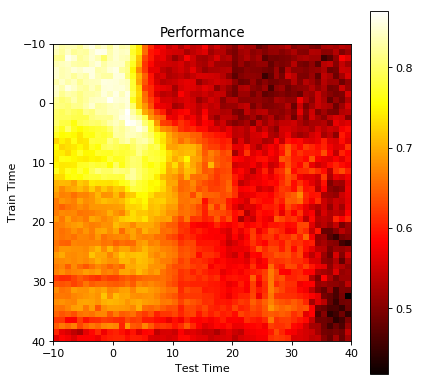

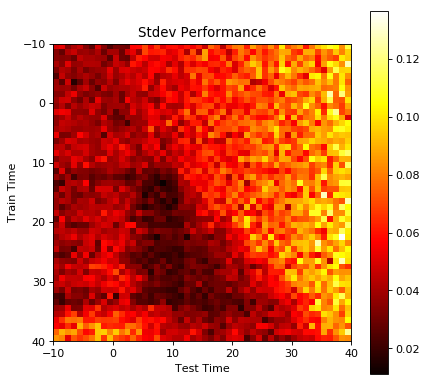

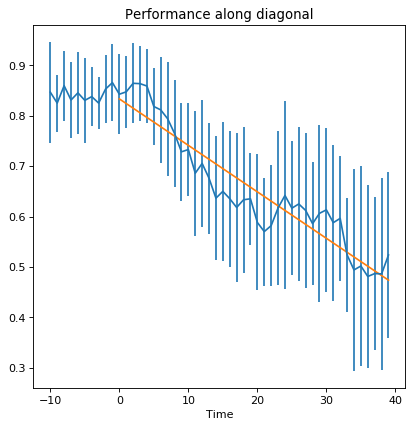

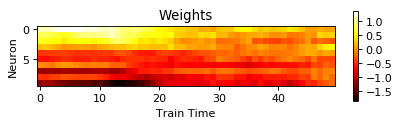

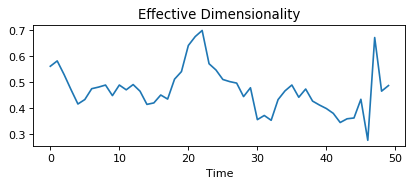

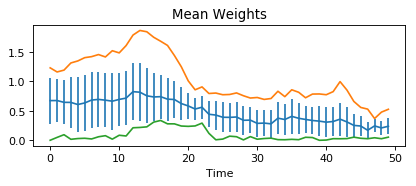

In [10]:
PCAORIperformance, PCAORIavgperformance, PCAORIstddev, PCAORInvalids, PCAORIweights = decoder(precenter, postcenter, span, N, mode='latent', target='orientation', latentvarpath='../runs/compiled_dF033016.pldsip_nld_10_plds_2018-4-16-16-2-3/output.pldsop')
plotdecoder(PCAORIavgperformance, PCAORIstddev, PCAORInvalids, precenter, postcenter, PCAORIweights)

In [10]:
STAORIperformance, STAORIavgperformance, STAORIstddev, STAORInvalids, STAORIweights = decoder(precenter, postcenter, span, N, mode='normalized', target='orientation')
plotdecoder(STAORIavgperformance, STAORIstddev, STAORInvalids, precenter, postcenter, STAORIweights, sort=dprimeorisort)

Iter 1


KeyboardInterrupt: 

In [8]:
nld = 4
nts = 20000
nn = 300
nsd = 4

data = scio.loadmat('../data/compiled_dF033016.mat')
frameHz = data['FrameRateHz'][0, 0]  # frames per seconds
y = data['behavdF'].T
onsetframe = np.rint(data['onsetFrame'].T[0]).astype(np.int32)
onsettime = np.array(data['onsetFrame'].T[0]) / frameHz

resptime = data['resptime'].T[0]
respframe = onsetframe + resptime * frameHz
correct = data['correct'][0]

offsettime = onsettime + resptime + 2.75 + (4.85 - 2.75) * (1 - correct)
offsetframe = np.rint(offsettime * frameHz).astype(np.int32)

orientation = np.array(data['orient'][0], np.int8) # 0 is vertical, 1 is horizontal
location = np.array((data['location'][0] + 1) // 2, np.int8) # 0 is top, 1 is bottom

u = np.zeros((y.shape[0], nsd))
for onf, off, ori, loc in zip(onsetframe, offsetframe, orientation, location):
    for frame in np.arange(onf, off):
        u[frame] = np.array([ori*loc, (1-ori)*loc, ori*(1-loc), (1-ori)*(1-loc)])
u = u.flatten()

# 0: horizontal, bottom
# 1: vertical, bottom
# 2: horizontal, top
# 3: vertical, top
stimclasses = ['hb', 'vb', 'ht', 'vt']
stimuli = 1 * (1 - orientation) * location + 2 * orientation * (1 - location) + 3 * (1 - orientation) * (1 - location)

# yvec = y.reshape(-1, nn)[:nts]
uvec = u.reshape(-1, nsd)

ysilent = []
for t in onsetframe:
    for i in range(1, 7):
        ysilent.append(y[t-i])
baselines = np.mean(ysilent, axis=0)

y_normalized = y/np.max(y, axis=0)

In [101]:
locdprime = np.load('location_offset_dprime.npy').T
oridprime = np.load('orientation_offset_dprime.npy').T

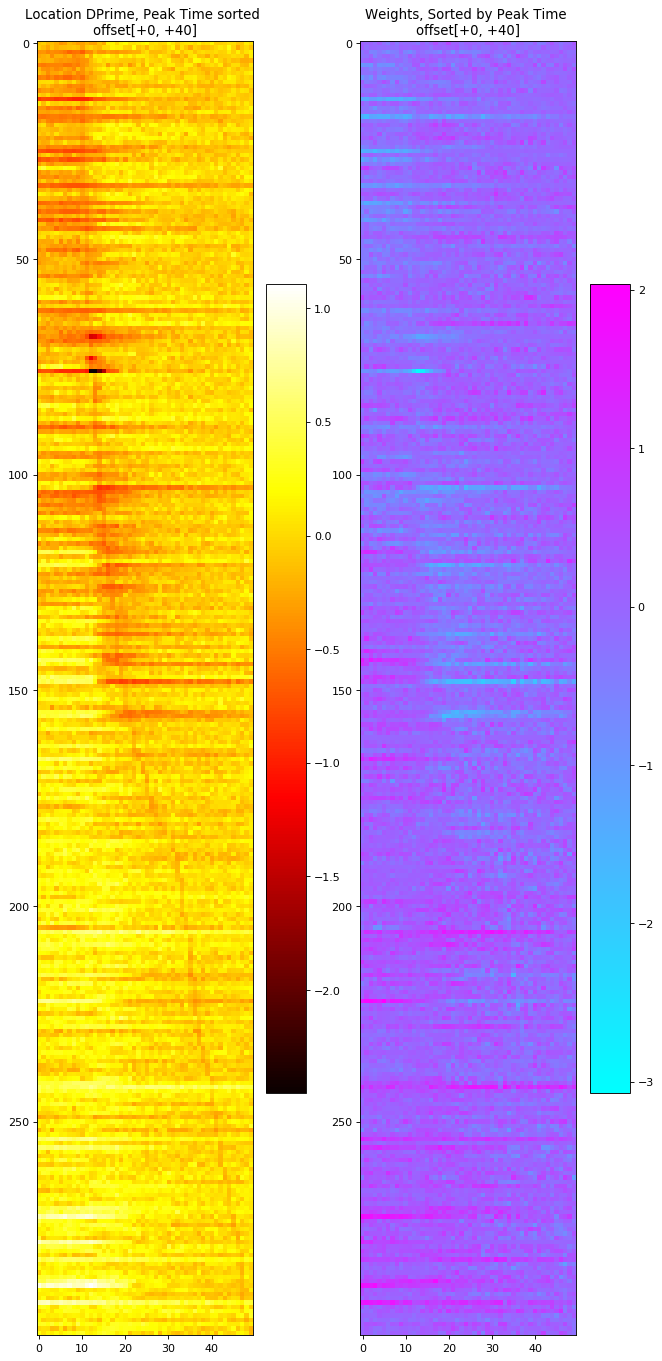

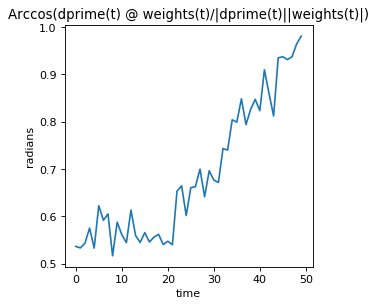

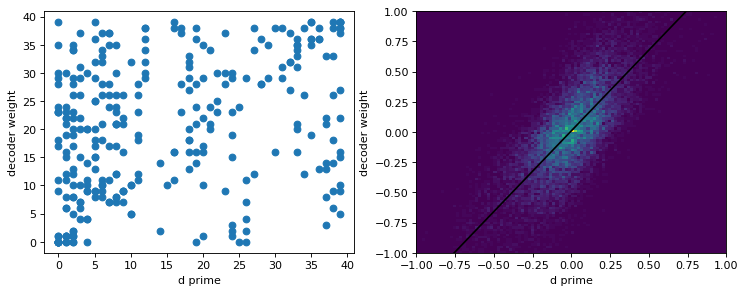

In [152]:
locpsths, locsortedpsths = getpsth(y, onsetframe, location, nn, 2, pre=10, post=40, baselines=None)
# locpsths = [locpsths[0] - locpsths[1], locpsths[1] - locpsths[0]]
timenormalizedlocweights = STALOCweights.copy()
# timenormalizedlocweights = np.abs(STALOCweights)
# timenormalizedlocweights = np.zeros_like(STALOCweights)
# for i in range(50):
#     timenormalizedlocweights[i] += np.abs(STALOCweights[i])/np.max(np.abs(STALOCweights[i]))
significantneuronsindexes = np.unique(np.where(np.abs(np.sum(timenormalizedlocweights[10:,:], axis=0)) > 0)[0])

dwdt = timenormalizedlocweights[1:, :] - timenormalizedlocweights[:-1, :]
ddpdt = locdprime[1:, :] - locdprime[:-1, :]
# plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
# plt.subplot(1,2,1)
# plt.title('Location=UP Peak Time \nonset[+0, +40]')
# plt.imshow(locpsths[1].T[significantneuronsindexes][np.argsort(np.argmax(locpsths[1].T[significantneuronsindexes][:,10:], axis=1))], cmap='hot')
# plt.colorbar()
# plt.subplot(1,2,2)
# plt.title('Weights, Sorted by Peak Time \nonset[+0, +40]')
# plt.imshow(timenormalizedlocweights.T[significantneuronsindexes][np.argsort(np.argmax(locpsths[1].T[significantneuronsindexes][:,10:], axis=1))], cmap='cool')
# plt.colorbar()
# plt.show()

plt.figure(figsize=(20, .08 * len(significantneuronsindexes)), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,4,1)
plt.title('Location DPrime, Peak Time sorted \noffset[+0, +40]')
plt.imshow(locdprime.T[significantneuronsindexes][np.argsort(np.argmin(locdprime.T[significantneuronsindexes][:,10:], axis=1))], cmap='hot')
plt.colorbar()
plt.subplot(1,4,2)
plt.title('Weights, Sorted by Peak Time \noffset[+0, +40]')
plt.imshow(timenormalizedlocweights.T[significantneuronsindexes][np.argsort(np.argmin(locdprime.T[significantneuronsindexes][:,10:], axis=1))], cmap='cool')
plt.colorbar()
# plt.subplot(1,4,3)
# plt.title('Location DPrime/dt, Peak Time sorted \noffset[+0, +40]')
# plt.imshow(dwdt.T[significantneuronsindexes][np.argsort(np.argmin(timenormalizedlocweights.T[significantneuronsindexes][:,10:], axis=1))], cmap='hot')
# plt.colorbar()
# plt.subplot(1,4,4)
# plt.title('dWeights/dt, Sorted by Peak Time \noffset[+0, +40]')
# plt.imshow(ddpdt.T[significantneuronsindexes][np.argsort(np.argmin(timenormalizedlocweights.T[significantneuronsindexes][:,10:], axis=1))], cmap='hot')
# plt.colorbar()
plt.show()

plt.figure(figsize=(4, 4), dpi=80, facecolor='w', edgecolor='k')
plt.title('Arccos(dprime(t) @ weights(t)/|dprime(t)||weights(t)|)')
plt.ylabel('radians')
plt.xlabel('time')
plt.plot([t for t in range(50)], [np.arccos(np.dot(locdprime.T[significantneuronsindexes][:,t], timenormalizedlocweights.T[significantneuronsindexes][:,t]) /\
                                            (np.linalg.norm(locdprime.T[significantneuronsindexes][:,t]) * np.linalg.norm(timenormalizedlocweights.T[significantneuronsindexes][:,t]))) for t in range(50)])
plt.show()

plt.figure(figsize=(11, 4), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(np.argmax(locdprime.T[significantneuronsindexes,10:], axis=1), np.argmax(timenormalizedlocweights.T[significantneuronsindexes,10:], axis=1), 'o')
# plt.plot(locdprime, timenormalizedlocweights, 'o')
plt.xlabel('d prime')
plt.ylabel('decoder weight')
plt.subplot(1,2,2)
plt.hist2d(locdprime.T[significantneuronsindexes].flatten(), timenormalizedlocweights.T[significantneuronsindexes].flatten(), bins=100, range=([-1, 1], [-1, 1]))
goodidx = (locdprime.T[significantneuronsindexes].flatten() >= -1)
fitparams = np.polyfit(locdprime.T[significantneuronsindexes].flatten()[goodidx], timenormalizedlocweights.T[significantneuronsindexes].flatten()[goodidx], 1)
linearfit = np.poly1d(fitparams)
xlims = plt.xlim()
plt.plot(np.linspace(xlims[0], xlims[1], 10), linearfit(np.linspace(xlims[0], xlims[1], 10)), 'k-')
plt.xlabel('d prime')
plt.ylabel('decoder weight')
plt.show()

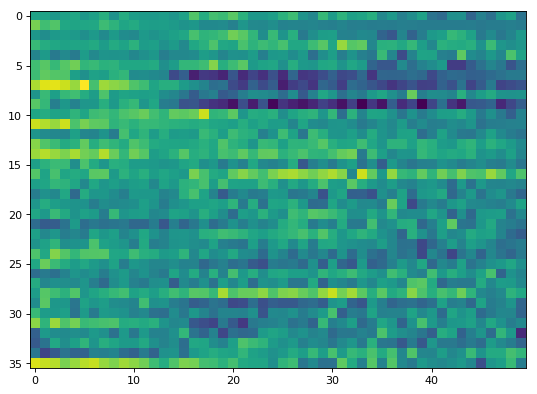

In [42]:
plt.figure(figsize=(8, 12), dpi= 80, facecolor='w', edgecolor='k')
# STALATweights[np.unique(np.where(STALATweights > 1)[0])].shape
# np.where(STALATweights > 1)[0]
plt.imshow(STALATweights.T[np.unique(np.where(STALATweights > 1)[1])])
plt.show()

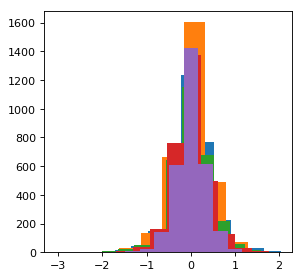

In [114]:
plt.figure(figsize=(4, 4), dpi= 80, facecolor='w', edgecolor='k')

plt.hist(STALOCweights[ 0:10,:].flatten())
plt.hist(STALOCweights[10:20,:].flatten())
plt.hist(STALOCweights[20:30,:].flatten())
plt.hist(STALOCweights[30:40,:].flatten())
plt.hist(STALOCweights[40:,:].flatten())
plt.show()


In [ ]:
oripsths, orisortedpsths = getpsth(y, onsetframe, orientation, nn, 2, pre=10, post=40, baselines=None)
timenormalizedoriweights = STAORIweights.copy()
# timenormalizedoriweights = np.zeros_like(STAORIweights)
# for i in range(300):
#     timenormalizedoriweights[:,i] += np.abs(STAORIweights[:, i])/np.max(np.abs(STAORIweights[:,i]))

plt.figure(figsize=(8, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.title('Orientation=Vert Peak Time \nonset[+0, +40]')
plt.imshow(oripsths[1].T[np.argsort(np.argmax(oripsths[1].T[:,10:], axis=1))], cmap='hot')
plt.colorbar()
plt.subplot(1,2,2)
plt.title('Weights, sorted by Peak Time \nonset[+0, +40]')
plt.imshow(timenormalizedoriweights.T[np.argsort(np.argmax(oripsths[1].T[:,10:], axis=1))], cmap='cool')
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.title('Orientation=Vert Peak Time \nonset[+0, +20]')
plt.imshow(oripsths[1].T[np.argsort(np.argmax(oripsths[1].T[:,10:30], axis=1))], cmap='hot')
plt.colorbar()
plt.subplot(1,2,2)
plt.title('Weights, sorted by Peak Time \nonset[+0, +20]')
plt.imshow(timenormalizedoriweights.T[np.argsort(np.argmax(oripsths[1].T[:,10:30], axis=1))], cmap='cool')
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.title('Orientation=Vert Peak Time \nonset[+20, +40]')
plt.imshow(oripsths[1].T[np.argsort(np.argmax(oripsths[1].T[:,30:], axis=1))], cmap='hot')
plt.colorbar()
plt.subplot(1,2,2)
plt.title('Weights, sorted by Peak Time \nonset[+20, +40]')
plt.imshow(timenormalizedoriweights.T[np.argsort(np.argmax(oripsths[1].T[:,30:], axis=1))], cmap='cool')
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.title('Orientation=Hori Peak Time \nonset[+0, +40]')
plt.imshow(oripsths[0].T[np.argsort(np.argmax(oripsths[0].T[:,10:], axis=1))], cmap='hot')
plt.colorbar()
plt.subplot(1,2,2)
plt.title('Weights, sorted by Peak Time \nonset[+0, +40]')
plt.imshow(timenormalizedoriweights.T[np.argsort(np.argmax(oripsths[0].T[:,10:], axis=1))], cmap='cool')
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.title('Orientation=Hori Peak Time \nonset[+0, +20]')
plt.imshow(oripsths[0].T[np.argsort(np.argmax(oripsths[0].T[:,10:30], axis=1))], cmap='hot')
plt.colorbar()
plt.subplot(1,2,2)
plt.title('Weights, sorted by Peak Time \nonset[+0, +20]')
plt.imshow(timenormalizedoriweights.T[np.argsort(np.argmax(oripsths[0].T[:,10:30], axis=1))], cmap='cool')
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.title('Orientation=Hori Peak Time \nonset[+20, +40]')
plt.imshow(oripsths[0].T[np.argsort(np.argmax(oripsths[0].T[:,30:], axis=1))], cmap='hot')
plt.colorbar()
plt.subplot(1,2,2)
plt.title('Weights, sorted by Peak Time \nonset[+20, +40]')
plt.imshow(timenormalizedoriweights.T[np.argsort(np.argmax(oripsths[0].T[:,30:], axis=1))], cmap='cool')
plt.colorbar()
plt.show()

In [91]:
print(np.argmax(locdprime.T[:,10:], axis=1), '\n\n', np.argmax(timenormalizedlocweights.T[:,10:], axis=1))

[33 27 39  0 26  4  7  5  6  7 26 36  1 37  2 35 30 33  6  2 39  2 35 35 12
 32  2 37 21  6 31  7 38  3  7 14  4 14  1 26  5  0 21 16  2 30 18 35 31 16
 13 16  5 28 21 22  1 22  3  2  0 38 38 35  4 15  6 31 14  0  0 36  1  2  2
  0  0  1 38 29  4  5 17  1 34 17 15  2  0 34 32 12  3 34 18 38 39 26 34  4
  2  4 38 12  9  6  7 32  1 33 20 29 34 27 39  1  2 14  1 12  8 39 33  1 26
 16  8  1  9 32 18  0  2  1 38 24  9  6 34  0 39 25 14 34  7  0 38  5 26 12
  5  4 16 13 37 15 37  5 18  4 38 19  6 12 15  4 38 22 12 28 17  3  7 11 14
 37  5 27  0  5 29  0 15  5  0 18 27  0 25 39  0 25  1 31 15 32 25 24 18 15
 37 34  8 30  7  0  6 39 39 31 14 35  1 10  0 26 39 38  1 39 24  0  1 26 29
 17  1  3 20  6  2  1 36 39 37 19 14 13 15  4 16 17 38 36 29  7 33  3 38 25
 28  6  0 20  3 15 31 38  5 39 15  0  1  1 38 26 39 18 17  2 27 39 16 36  1
 18  3 10  3  1 37 13 15  3 37 37 31 33  0  0  0 39  3 17  0 39 35  3  6  2] 

 [23 19 37 10 24 24 34 19 13 13  9 22 10 10  0 10 21 26 27 37 17 13 38 26 28
 25 33  

In [60]:
 linearfit(np.linspace(-5, 5, 10))

array([-6.63916397, -5.16164255, -3.68412113, -2.20659971, -0.7290783 ,
        0.74844312,  2.22596454,  3.70348596,  5.18100737,  6.65852879])

(array([   1.,    1.,    6.,   14.,   69.,  147.,   44.,   13.,    3.,    2.]),
 array([-48.67446773, -39.6086527 , -30.54283768, -21.47702265,
        -12.41120762,  -3.34539259,   5.72042243,  14.78623746,
         23.85205249,  32.91786752,  41.98368254]),
 <a list of 10 Patch objects>)

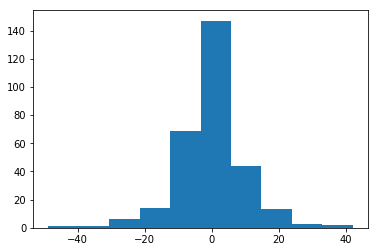

In [132]:
plt.hist(np.sum(timenormalizedlocweights[10:,:], axis=0))

In [100]:
print(locpsths[0][:,6] - locpsths[1][:,6])
        

[  0.00000000e+00   0.00000000e+00   2.91231606e-01   2.84012001e-01
  -4.74867191e-01  -9.98340475e-01   1.00000000e+00   0.00000000e+00
   0.00000000e+00   6.61864113e-02  -2.97052039e-02  -4.30290911e-01
  -3.42389985e-01   7.73536078e-02  -1.90297715e-01   9.57478979e-04
  -3.65837173e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.00190263e-01   2.88241888e-02
   0.00000000e+00   2.54772967e-02   8.09541237e-02   1.13248100e-01
   0.00000000e+00   1.45645480e-01   0.00000000e+00   7.10233735e-01
   6.84543112e-02   2.29657953e-01   9.60397556e-02   0.00000000e+00
   2.21868043e-02   1.07137976e-01  -5.42012958e-02   0.00000000e+00
  -2.22342175e-01   5.24254318e-01  -1.73639546e-02   0.00000000e+00
  -2.88073060e-01  -2.44758805e-01  -9.36877722e-02   1.22266767e-01
   2.31521750e-01   0.00000000e+00]


(49, 300)

In [143]:
locdprime.T[significantneuronsindexes][:,t].shape

(61,)